In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

import nltk
import random

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
nltk.download('wordnet')

from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer,LancasterStemmer, SnowballStemmer
from nltk.tokenize import word_tokenize
import re
porter = PorterStemmer()
Lancaster = LancasterStemmer()
snowball= SnowballStemmer('english')
wordnet = WordNetLemmatizer() 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
url = 'https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv'
df0 = pd.read_csv(url, sep="\t")
numSentences = df0['SentenceId'].max()

In [3]:
df0.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [4]:
sample0 = df0.sample(frac=1)
sample0.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
42806,42807,2065,the images,2
120495,120496,6442,it does n't disappoint .,3
97490,97491,5098,"post , pre",2
150578,150579,8206,when the TV cow is free,2
33001,33002,1546,Ray,2
15380,15381,658,pity and sympathy,2
136550,136551,7383,"with ambitious , eager first-time filmmakers",3
155992,155993,8540,to go with this claustrophobic concept,1
53354,53355,2647,comic set,3
137617,137618,7445,has nothing,1


In [0]:
all_data = pd.DataFrame(df0, columns=['Phrase', 'Sentiment'])
# Splits the dataset so 70% is used for training and 30% for testing
x_train, x_test, y_train, y_test = train_test_split(all_data['Phrase'], all_data['Sentiment'], test_size=0.3)

In [6]:
x_test

113967    The Irwins ' scenes are fascinating ; the movi...
90853                                       never quite gel
152915    look behind the curtain that separates comics ...
140498    that has bucked the odds to emerge as an exqui...
120920                                  of dramatic urgency
                                ...                        
28717                as a serious drama about spousal abuse
135995    The elements were all there but lack of a pysc...
48948                                             routinely
91131     to films which will cause loads of irreparable...
17222                                                 lower
Name: Phrase, Length: 46818, dtype: object

In [7]:
train = pd.DataFrame(list(zip(x_train, y_train)), columns=['Phrase','Sentiment'])
test = pd.DataFrame(list(zip(x_test, y_test)), columns=['Phrase','Sentiment'])
print(train)

                                                   Phrase  Sentiment
0                      half-hearted paeans to empowerment          2
1                                               composure          2
2                                        recognize it and          2
3       children 's entertainment , superhero comics ,...          2
4                         see what the director does next          2
...                                                   ...        ...
109237                                        a solid job          2
109238                                 John Hughes comedy          3
109239         maintaining consciousness just long enough          1
109240  for conveying the way tiny acts of kindness ma...          3
109241                      with the titillating material          3

[109242 rows x 2 columns]


In [0]:
documents = []
#convert data into format for the previous labs

#use full dataset
for i in range(train.shape[0]):
 tmpWords = word_tokenize(train['Phrase'][i])
 documents.append((tmpWords, train['Sentiment'][i]))

# Use only complete sentences
# for i in range(fullSentDf.shape[0]):
#   tmpWords = word_tokenize(fullSentDf['Phrase'][i])
#   documents.append((tmpWords, fullSentDf['Sentiment'][i]))

In [9]:
random.seed(9001)
random.shuffle(documents)
print(documents[1])

(['Snipes', 'relies', 'too', 'much', 'on', 'a', 'scorchingly', 'plotted', 'dramatic', 'scenario', 'for', 'its', 'own', 'good', '.'], 2)


In [10]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer
porter = PorterStemmer()
lancaster=LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_en = stopwords.words("english")
punctuations="?:!.,;'\"-()"

#parameters to adjust to see the impact on outcome
remove_stopwords = True
useStemming = True
useLemma = False
removePuncs = True

for l in range(len(documents)):
  label = documents[l][1]
  tmpReview = []
  for w in documents[l][0]:
    newWord = w
    if remove_stopwords and (w in stopwords_en):
      continue
    if removePuncs and (w in punctuations):
      continue
    if useStemming:
      newWord = porter.stem(newWord)
      # newWord = lancaster.stem(newWord)
    if useLemma:
      newWord = wordnet_lemmatizer.lemmatize(newWord)
    tmpReview.append(newWord)
  documents[l] = (' '.join(tmpReview), label)
print(documents[2])

('frustrat reward', 2)


In [0]:
all_data = pd.DataFrame(documents, columns=['Phrase', 'Sentiment'])

In [12]:
all_data

,Phrase,Sentiment
0,brutal clueless,1
1,snipe reli much scorchingli plot dramat scenar...,2
2,frustrat reward,2
3,you feel good feel sad feel piss,3
4,flood,2
...,...,...
109237,detail condens,2
109238,ke burstein,2
109239,advis take warn liter log someth user-friendli,1
109240,pretti convinc perform,4


In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 10000, stop_words="english", ngram_range=(1,2))

x_train = vectorizer.fit_transform(all_data["Phrase"])
y_train=all_data["Sentiment"]

In [0]:
X = vectorizer.fit_transform(all_data["Phrase"])
Y = all_data['Sentiment']

x_train_np = x_train.toarray()
y_train_np=np.array(y_train)

In [15]:
print(x_train_np.shape)
print(y_train_np.shape)
print(all_data.Sentiment.value_counts())

(109242, 10000)
(109242,)
2    55696
3    23037
1    19103
4     6422
0     4984
Name: Sentiment, dtype: int64


In [0]:
# Import the pytorch library
import torch
# Import the 1D convolution layer 
from torch.nn import Conv1d
# Import the max pooling layer
from torch.nn import MaxPool1d
# Import the flatten layer
from torch.nn import Flatten
# Import the linear layer
from torch.nn import Linear
# Import the ReLU activation function
from torch.nn.functional import relu, softmax, sigmoid
# Import the DataLoader and TensorDataset libraries from PyTorch to work with our datasets
from torch.utils.data import DataLoader, TensorDataset
from torch.nn import CrossEntropyLoss

In [0]:
# Our class MUST be a subclass of torch.nn.Module
class CnnClassifier(torch.nn.Module):
# Define the initialization method
  def __init__(self, batch_size, inputs, outputs):
  # Initialize the superclass and store the parameters
    super(CnnClassifier, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs = outputs
    # Define the input layer
    # (input channels, output channels, kernel size)
    self.input_layer = Conv1d(inputs, batch_size, 1) # Define a max pooling layer
    # (kernel size)
    self.max_pooling_layer = MaxPool1d(1)

    self.conv_layer0 = Conv1d(batch_size, 32, 1)
    self.max_pooling_layer0 = MaxPool1d(1)

    self.conv_layer1 = Conv1d(32, 64, 1)
    self.max_pooling_layer1 = MaxPool1d(1)

    self.conv_layer2 = Conv1d(64, 128, 1)
    self.max_pooling_layer2 = MaxPool1d(1)


    # Define a flatten layer
    self.flatten_layer = Flatten()
    # Define a linear layer
    # (inputs, outputs)
    self.linear_layer = Linear(128, 64) # Finally, define the output layer
    self.output_layer = Linear(64, outputs)
    # Add a sigmoid layer to get a value between 0 and 1
    # self.softmax = torch.nn.Softmax(dim = 1)

  # Define a method to feed inputs through the model

  def feed(self, input):
  # Reshape the entry so it can be fed to the input layer
  # Although we’re using 1D convolution, it still expects a 3D array to process in a 1D fashion
    input = input.reshape((self.batch_size, self.inputs, 1))
    # Get the output of the first layer and run it through the
    # the ReLU activation function
    output = relu(self.input_layer(input))
    # Get the output of the max pooling layer
    output = self.max_pooling_layer(output)
    # Get the output of the second convolution layer and run it
    # through the ReLU activation function
    
    output = relu(self.conv_layer0(output))
    output = self.max_pooling_layer0(output)

    output = relu(self.conv_layer1(output))
    output = self.max_pooling_layer1(output)

    output = relu(self.conv_layer2(output))
    output = self.max_pooling_layer2(output)
    
    # Get the output of the flatten layer
    output = self.flatten_layer(output)
    # Get the output of the linear layer and run it through the
    # ReLU activation function
    output = self.linear_layer(output)
    # Finally, get the output of the output layer and return it
    output = self.output_layer(output)
    #We get a float value between 0 and 1 for our binary classifier and loss function
    # output = sigmoid(output)
    #We return another variable with output of integer 0 or 1, for accuracy & F-score
    output_ = torch.round(output)
    output = softmax(output)
    #We can also try using softmax instead of or in conjunction with the sigmoid
    #output = softmax(output)
    return output, output_

In [18]:
# Import the SGD (stochastic gradient descent) package from pytorch for
# our optimizer
from torch.optim import Adam, Adamax
# Import the L1Loss (mean absolute error loss) package from pytorch for
# our performance measure
from torch.nn import L1Loss
# Import accuracy, precision & recall score package from pytorch's ignite for our score measure
# This package is not installed by default so the next line does that
!pip install pytorch-ignite
from ignite.metrics import Accuracy, Recall, Precision
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
# Define the batch size we'd like to use
batch_size = 128 # (batch size, X columns, Y columns)
model = CnnClassifier(batch_size, x_train.shape[1], 5) # Set the model to use the GPU for processing
model.cuda()

CnnClassifier(
  (input_layer): Conv1d(10000, 128, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer0): Conv1d(128, 32, kernel_size=(1,), stride=(1,))
  (max_pooling_layer0): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer1): Conv1d(32, 64, kernel_size=(1,), stride=(1,))
  (max_pooling_layer1): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer2): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  (max_pooling_layer2): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (flatten_layer): Flatten()
  (linear_layer): Linear(in_features=128, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=5, bias=True)
)

In [0]:
def model_loss(model, dataset, train = False, optimizer = None):
  # Cycle through the batches and get the average L1 loss
  performance = CrossEntropyLoss()
  
  avg_accu = 0;
  avg_rec = 0
  avg_prec = 0
  avg_loss = 0
  count = 0
  for input, output in iter(dataset):
    
    # Get the model's predictions for the training dataset
    predictions, predictions_ = model.feed(input) # Get the model's loss using the float returned variable

    z=[]
    out = output.data.cpu().numpy()
    for o in out:
      z.append(int(o[0]))

    pred, indices = torch.max(predictions,1)

    a_list = torch.FloatTensor(z).cuda().long()


    loss = performance(predictions, a_list)
    # Get the model's performance metrices using the binary returned output
    
    tmp_accu = accuracy_score(z, indices.data.cpu())
    tmp_prec = recall_score(z, indices.data.cpu(), average='macro')
    tmp_rec = precision_score(z, indices.data.cpu(), average='macro')
    if(train):
      # Clear any errors so they don't cummulate
      optimizer.zero_grad()
      # Compute the gradients for our optimizer
      loss.backward()
      # Use the optimizer to update the model's parameters based on the gradients
      optimizer.step()
    # Store the loss and update the counter
    avg_loss += loss.item()
    # Accumulate performance metrices
    avg_accu += tmp_accu
    avg_prec += tmp_prec
    avg_rec += tmp_rec
    count += 1
  return avg_loss / count, avg_accu / count, avg_prec / count, avg_rec / count

In [20]:
# Define the number of epochs to train for
epochs = 35
e1=[]
a1=[]
l1=[]
f1plot=[]
# Define the performance measure and optimizer
optimizer = Adam(model.parameters(), lr=1e-3)
#optimizer = Adam(model.parameters())
# Convert the training set into torch variables for our model using the GPU
# as floats. The reshape is to remove a warning pytorch outputs otherwise.
inputs = torch.from_numpy(x_train_np).cuda().float()
outputs = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0], 1)).cuda().float()

# Create a DataLoader instance to work with our batches
tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True) # Start the training loop
for epoch in range(epochs):
  e1.append(epoch+1)
  # Cycle through the batches and get the average loss
  avg_loss, avg_accu, avg_prec, avg_rec = model_loss(model, loader, train=True, optimizer=optimizer)
  f1 = (2*(avg_prec*avg_rec)/(avg_prec + avg_rec)) #calculate the f1 score
  a1.append(avg_accu)
  l1.append(avg_loss)
  f1plot.append(f1)
  # Output the average loss & performance metrices
  print("Epoch " + str(epoch + 1) + ":\n\tLoss = " + str(avg_loss) + "\n\tAccuracy = " + str(avg_accu) + "\n\tF1 Score = " + str(f1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1:
	Loss = 1.371223022761686
	Accuracy = 0.5339243845252052
	F1 Score = 0.19333222842086373
Epoch 2:
	Loss = 1.3089650796697958
	Accuracy = 0.592266266119578
	F1 Score = 0.28858095217693835
Epoch 3:
	Loss = 1.2735491037927786
	Accuracy = 0.628810082063306
	F1 Score = 0.3527270513941692
Epoch 4:
	Loss = 1.2572624744871437
	Accuracy = 0.6453967614302462
	F1 Score = 0.3674094738131739
Epoch 5:
	Loss = 1.2475336314924717
	Accuracy = 0.6555539273153576
	F1 Score = 0.37698635600533564
Epoch 6:
	Loss = 1.2393503254770812
	Accuracy = 0.6640625
	F1 Score = 0.4206411528750301
Epoch 7:
	Loss = 1.230581185742252
	Accuracy = 0.672809202813599
	F1 Score = 0.48375694164409433


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 8:
	Loss = 1.2219260489395607
	Accuracy = 0.6818123534583822
	F1 Score = 0.5247723051401418
Epoch 9:
	Loss = 1.2149513625875028
	Accuracy = 0.6888280334114889
	F1 Score = 0.548153450242451
Epoch 10:
	Loss = 1.2082529230106618
	Accuracy = 0.6957429660023446
	F1 Score = 0.5678133406268965
Epoch 11:
	Loss = 1.202923831179441
	Accuracy = 0.7011466881594373
	F1 Score = 0.5852560264294798
Epoch 12:
	Loss = 1.2001729148493563
	Accuracy = 0.704059202813599
	F1 Score = 0.5903719140096167
Epoch 13:
	Loss = 1.197509955409543
	Accuracy = 0.7067793815943728
	F1 Score = 0.5970353642201734
Epoch 14:
	Loss = 1.1951957161233686
	Accuracy = 0.7090416178194607
	F1 Score = 0.6040571623832459
Epoch 15:
	Loss = 1.1928873524716144
	Accuracy = 0.7115694607268465
	F1 Score = 0.6046107590608931
Epoch 16:
	Loss = 1.1912332421031115
	Accuracy = 0.7132546893317703
	F1 Score = 0.6093033169667674
Epoch 17:
	Loss = 1.188937403811939
	Accuracy = 0.7155077667057445
	F1 Score = 0.6142885214730954
Epoch 18:
	Loss =

In [0]:
documents2 = []
#convert data into format for the previous labs

#use full dataset
for i in range(test.shape[0]):
 tmpWords = word_tokenize(test['Phrase'][i])
 documents2.append((tmpWords, test['Sentiment'][i]))

In [22]:
random.seed(9001)
random.shuffle(documents2)
print(documents2[1])

(['One', 'suspects', 'that', 'Craven', 'endorses', 'They', 'simply', 'because', 'this', 'movie', 'makes', 'his', 'own', 'look', 'much', 'better', 'by', 'comparison', '.'], 1)


In [23]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer
porter = PorterStemmer()
lancaster=LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_en = stopwords.words("english")
punctuations="?:!.,;'\"-()"

#parameters to adjust to see the impact on outcome
remove_stopwords = True
useStemming = True
useLemma = False
removePuncs = True

for l in range(len(documents2)):
  label = documents2[l][1]
  tmpReview = []
  for w in documents2[l][0]:
    newWord = w
    if remove_stopwords and (w in stopwords_en):
      continue
    if removePuncs and (w in punctuations):
      continue
    if useStemming:
      newWord = porter.stem(newWord)
      # newWord = lancaster.stem(newWord)
    if useLemma:
      newWord = wordnet_lemmatizer.lemmatize(newWord)
    tmpReview.append(newWord)
  documents2[l] = (' '.join(tmpReview), label)
print(documents2[2])

('jonah', 2)


In [0]:
all_data2 = pd.DataFrame(documents2, columns=['Phrase', 'Sentiment'])

In [25]:
test

,Phrase,Sentiment
0,The Irwins ' scenes are fascinating ; the movi...,0
1,never quite gel,1
2,look behind the curtain that separates comics ...,2
3,that has bucked the odds to emerge as an exqui...,4
4,of dramatic urgency,2
...,...,...
46813,as a serious drama about spousal abuse,3
46814,The elements were all there but lack of a pysc...,1
46815,routinely,2
46816,to films which will cause loads of irreparable...,1


In [26]:
all_data2

,Phrase,Sentiment
0,perfect face play handsom blank yearn find,2
1,one suspect craven endors they simpli movi mak...,1
2,jonah,2
3,idol,3
4,cold dead,1
...,...,...
46813,basic,2
46814,murphi wilson actual make pretti good team ......,2
46815,ticket,2
46816,use make movi also sometim still made,2


In [0]:
vectorizer = TfidfVectorizer(max_features = 10000, stop_words="english", ngram_range=(1,2))

In [28]:
x_test = vectorizer.fit_transform(all_data2["Phrase"])
y_test = all_data2["Sentiment"]

x_test_np = x_test.toarray()
y_test_np=np.array(y_test)

# Test the model
inputs = torch.from_numpy(x_test_np).cuda().float()
outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0], 1)).cuda().float()

# Create DataLoader instance to work with batches
tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)

# Cycle through batches and get average loss and other metrics
avg_loss, avg_accu, avg_prec, avg_rec = model_loss(model, loader)

# Get f1 score
f1 = (2 * (avg_rec * avg_prec)/(avg_rec + avg_prec))

# Printing the loss and other metrics
print("Loss = " + str(avg_loss) +
    "\nTesting Accuracy = " + str(avg_accu) + 
      "\nTesting F1 Score = " + str(f1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loss = 1.4382318983339284
Testing Accuracy = 0.46579623287671235
Testing F1 Score = 0.21821134511794385


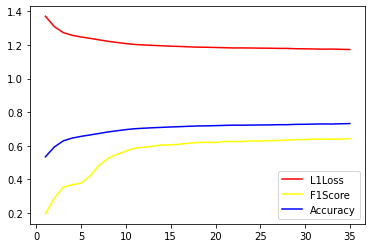

In [29]:
import matplotlib.pyplot as plt# Create the  and show it# For the predictions, since they're on the GPU, we need to move them to the CPU


plt.plot(e1,l1, color='red', label= "L1Loss")
plt.plot(e1,f1plot, color='yellow', label= "F1Score")
plt.plot(e1,a1, color='blue', label= "Accuracy")
plt.legend()